In [3]:
from astropy.io import fits
hdus = fits.open('bgs_2020-03-08_0150s_001_coadd.fits')
hdus.info()

Filename: bgs_2020-03-08_0150s_001_coadd.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  FIBERMAP      1 BinTableHDU    196   100R x 92C   [K, K, K, K, K, D, D, D, D, K, K, 4A, J, D, K, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 1A, J, K, K, J, K, J, J, J, J, J, 3A, E, E, E, K, B, I, D, D, E, E, E, E, E, E, J, J, J, J, J, I, K, K, K, K, K, K, K, K, K, K, K, K, K, K, K]   
  2  BRZ_WAVELENGTH    1 ImageHDU        10   (6265,)   float64   
  3  BRZ_FLUX      1 ImageHDU        11   (6265, 100)   float32   
  4  BRZ_IVAR      1 ImageHDU        11   (6265, 100)   float32   
  5  BRZ_MASK      1 ImageHDU        12   (6265, 100)   int32 (rescales to uint32)   
  6  BRZ_RESOLUTION    1 ImageHDU        11   (6265, 11, 100)   float32   
  7  SCORES        1 BinTableHDU     30   100R x 9C   [D, D, D, D, D, D, D, D, D]   


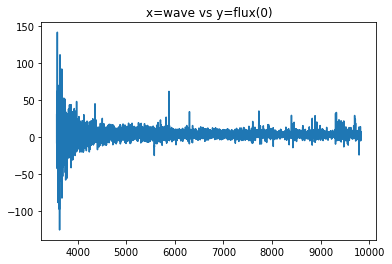

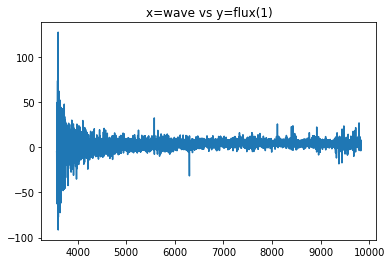

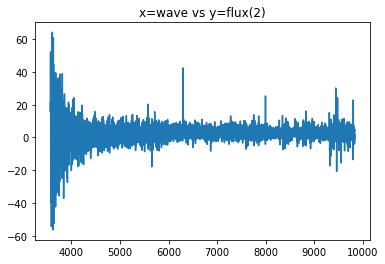

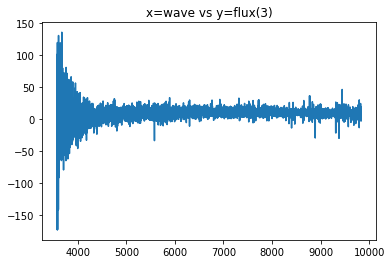

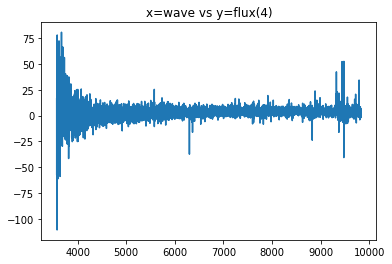

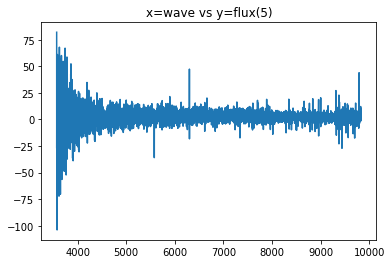

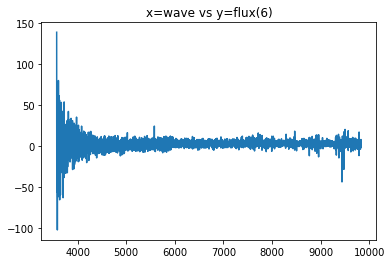

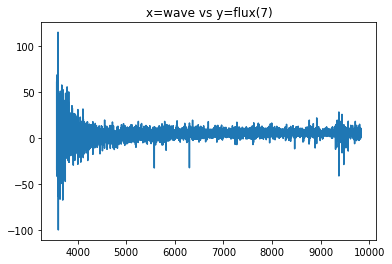

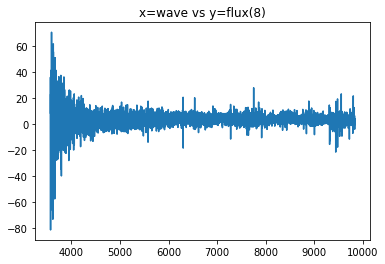

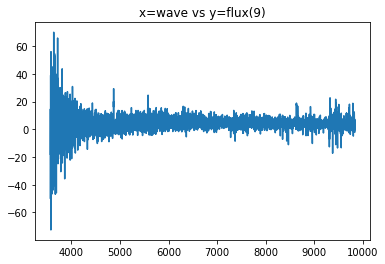

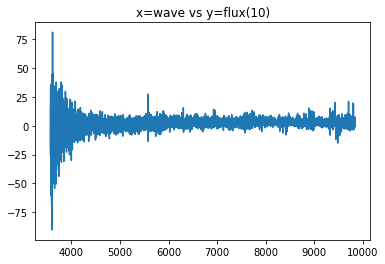

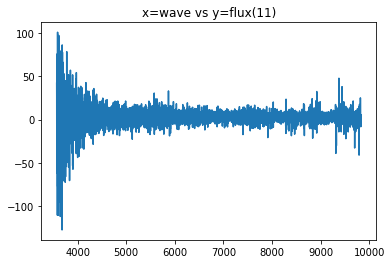

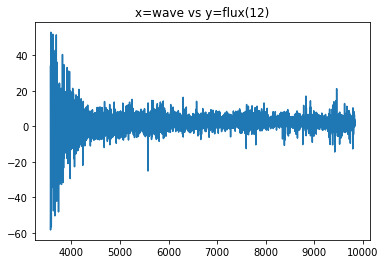

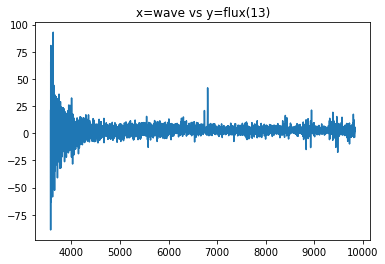

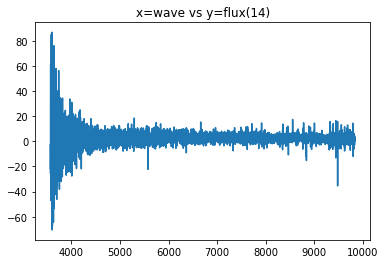

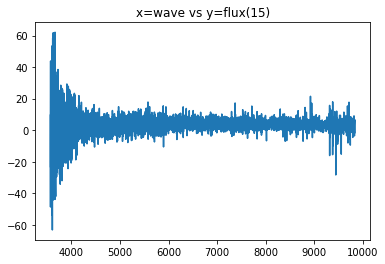

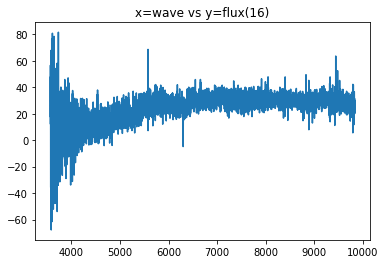

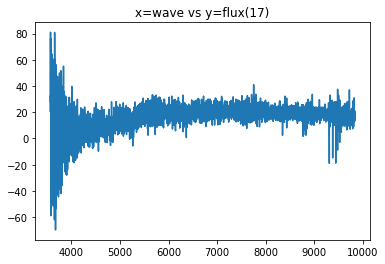

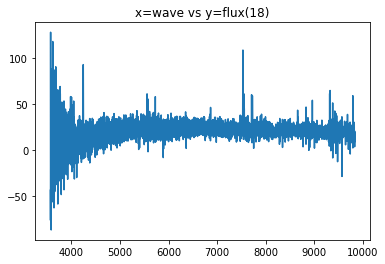

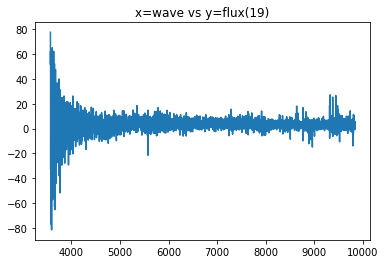

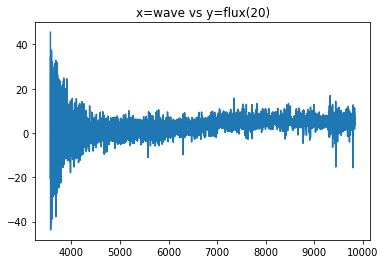

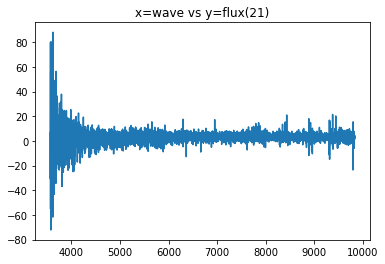

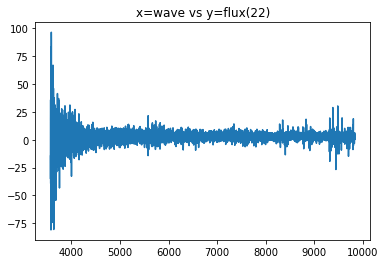

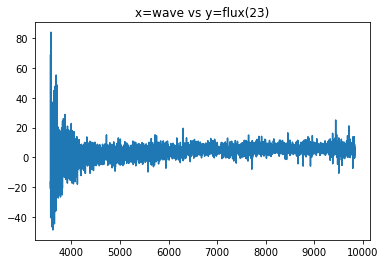

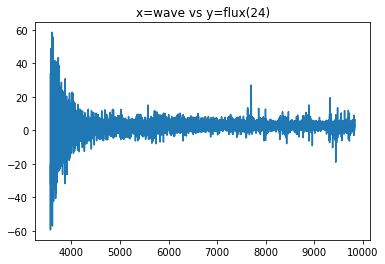

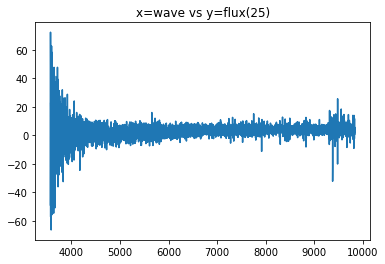

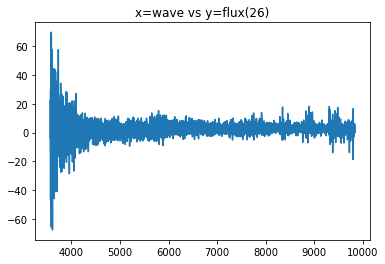

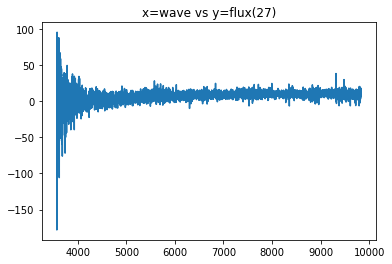

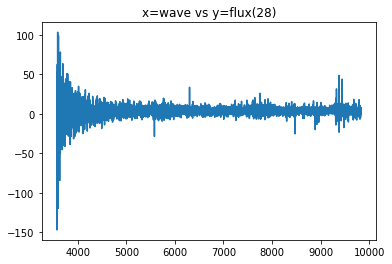

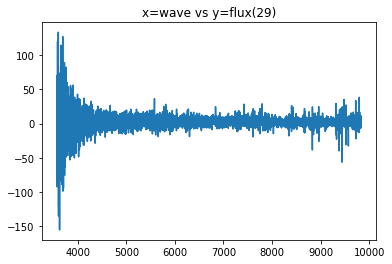

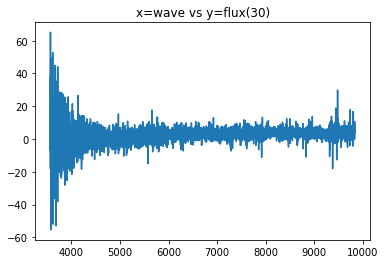

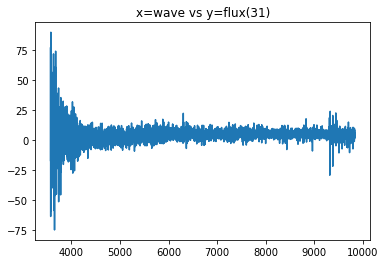

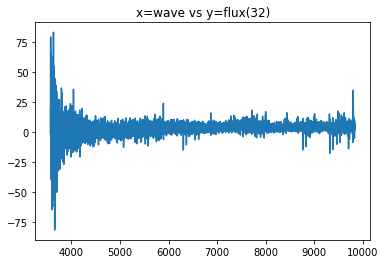

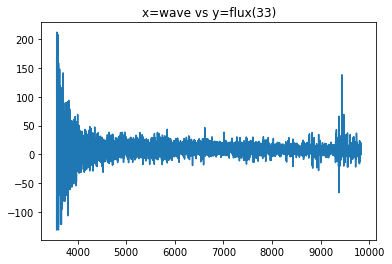

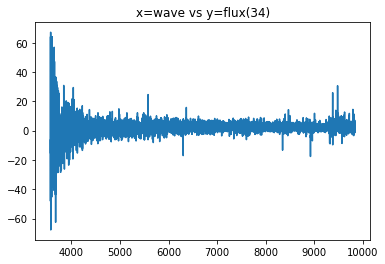

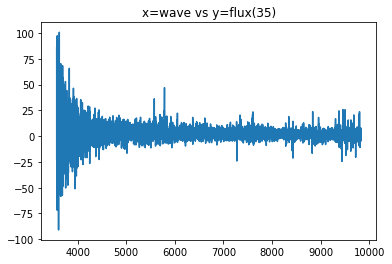

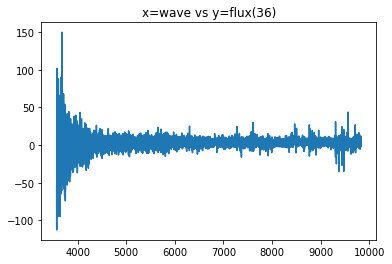

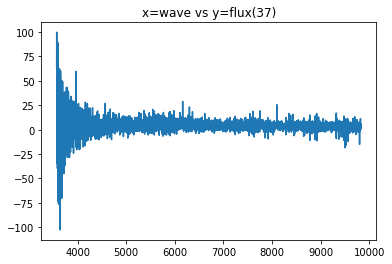

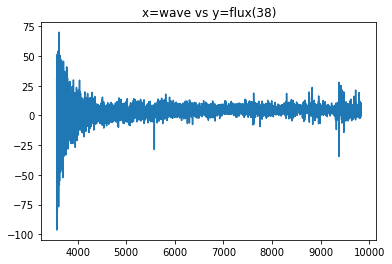

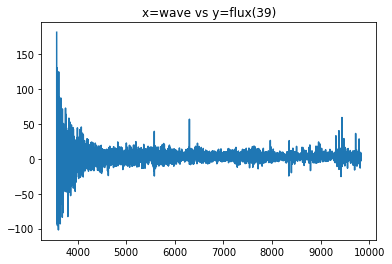

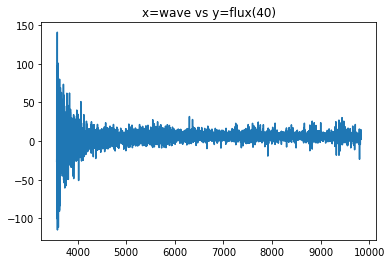

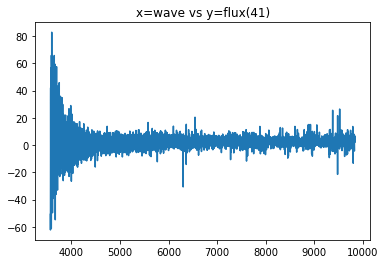

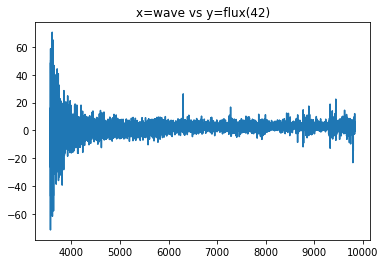

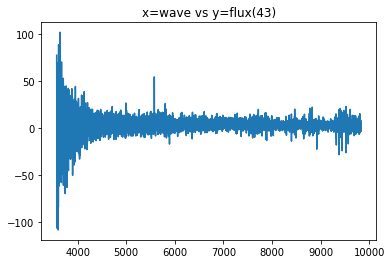

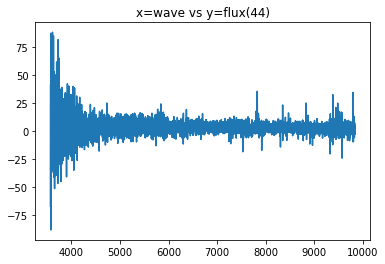

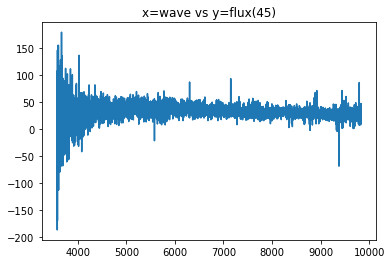

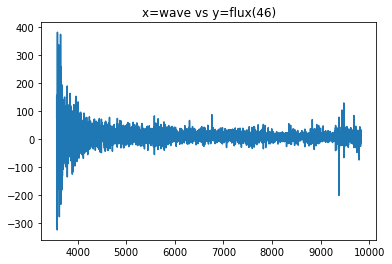

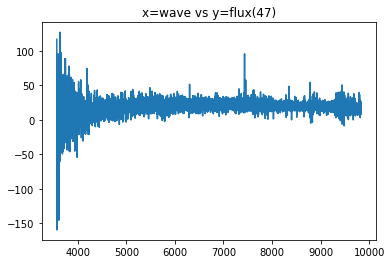

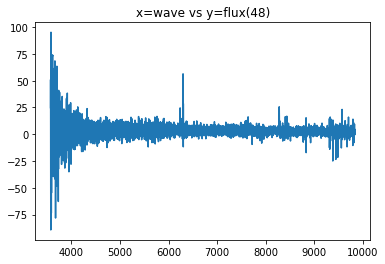

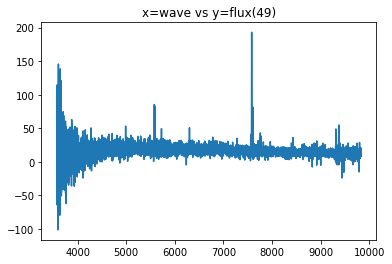

In [4]:
import matplotlib.pyplot as plt
import scipy as sp
from scipy.ndimage import median_filter
get_ipython().run_line_magic('matplotlib', 'inline')

hdus = fits.open('bgs_2020-03-08_0150s_001_coadd.fits')

# Get wavelength array (there is just one).
wave = hdus['BRZ_WAVELENGTH'].data

# Get flux array (there are 100 fluxes).
flux = hdus['BRZ_FLUX'].data

for i in range(50):
    plt.figure()
    plt.plot(wave, flux[i])
    plt.title("x=wave vs y=flux({0})".format(i))
    plt.show()

plt.show()



/Users/amandawasserman/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


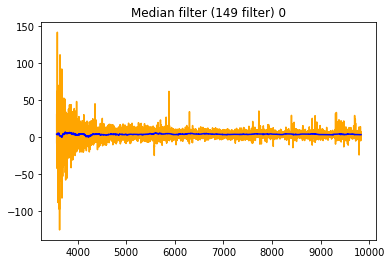

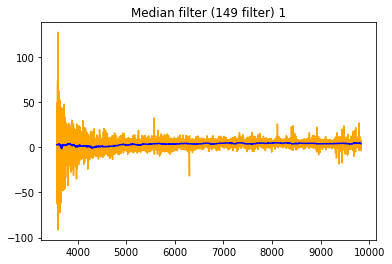

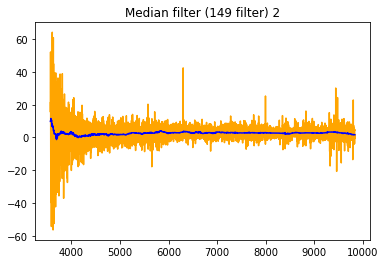

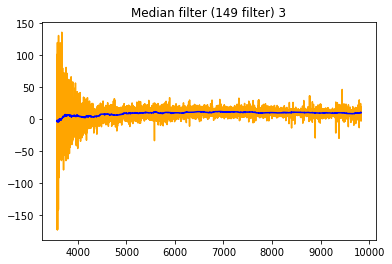

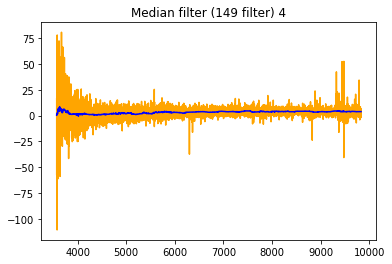

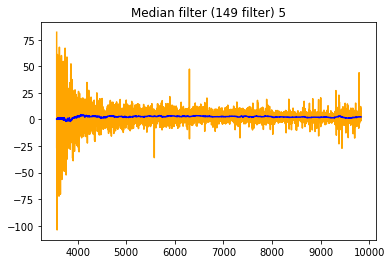

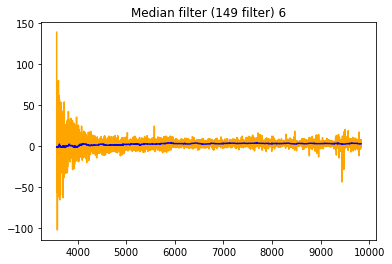

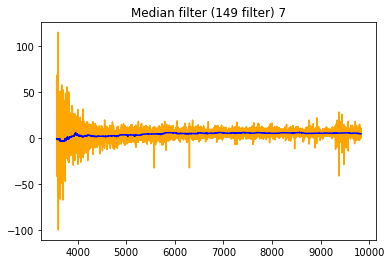

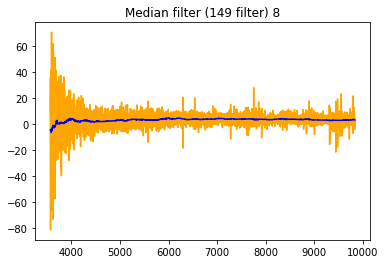

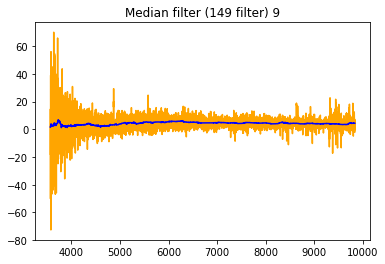

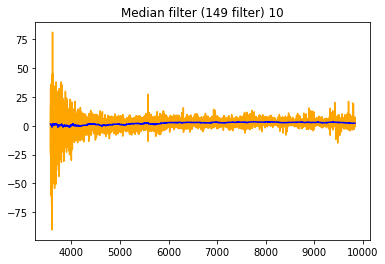

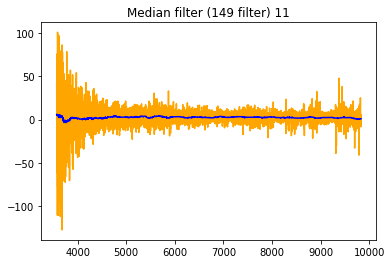

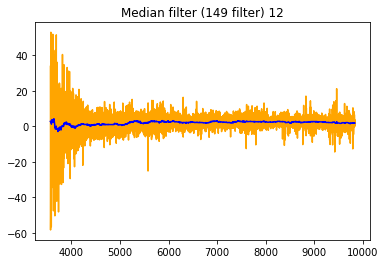

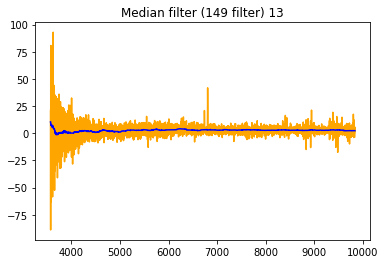

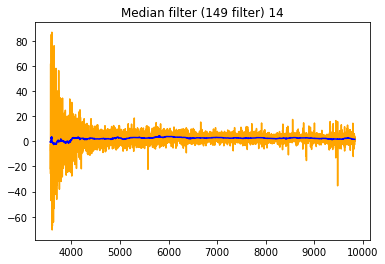

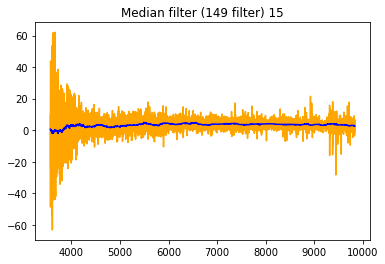

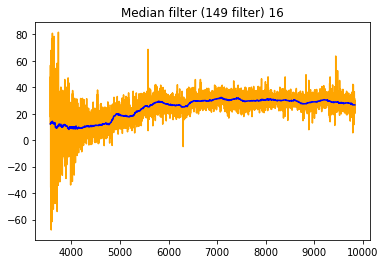

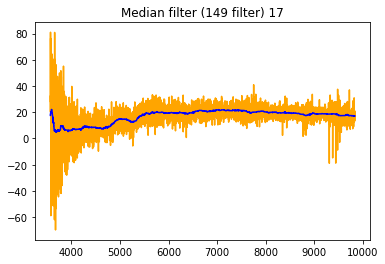

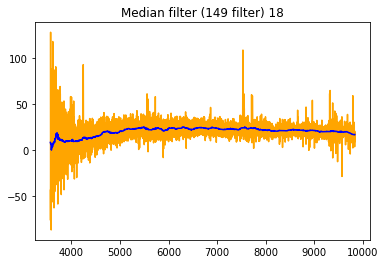

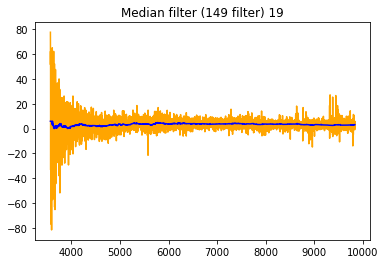

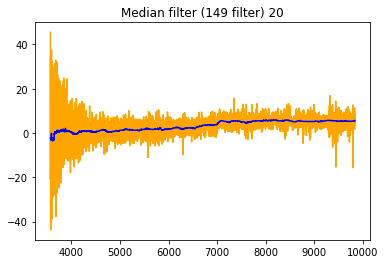

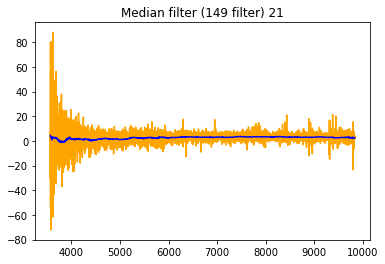

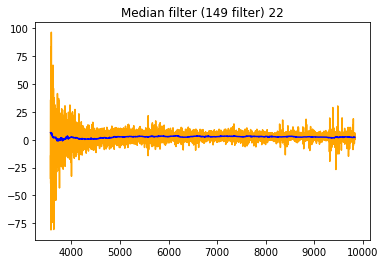

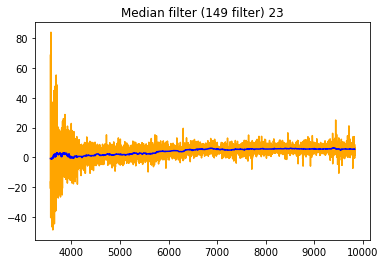

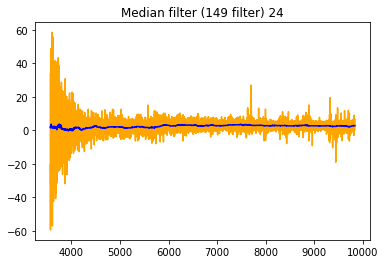

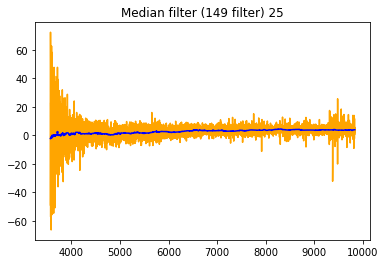

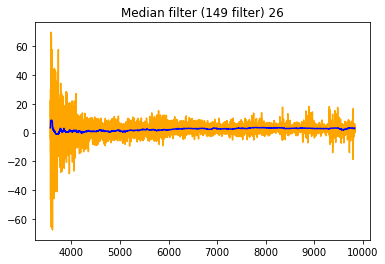

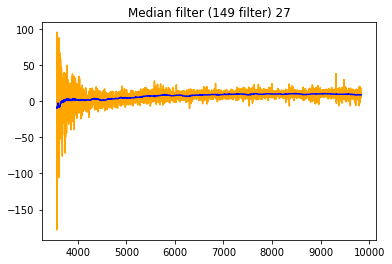

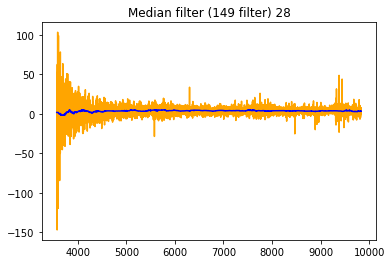

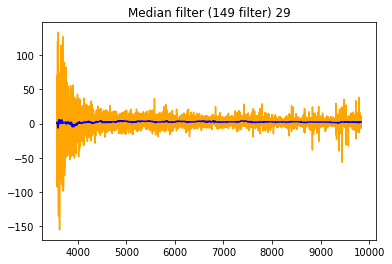

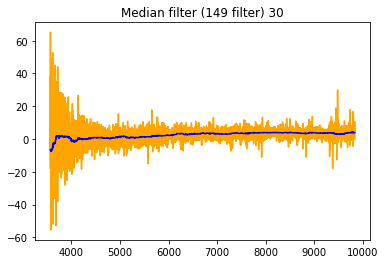

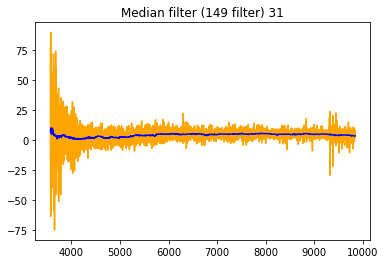

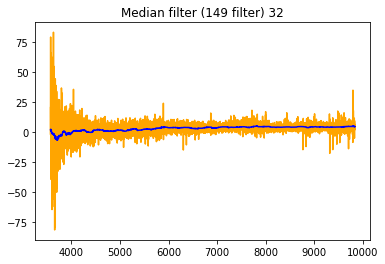

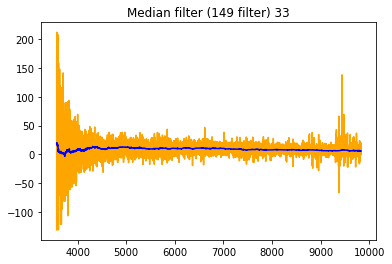

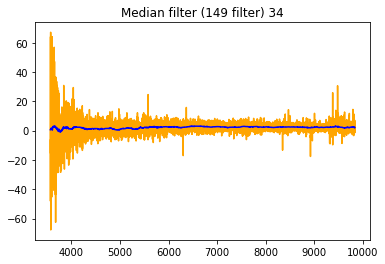

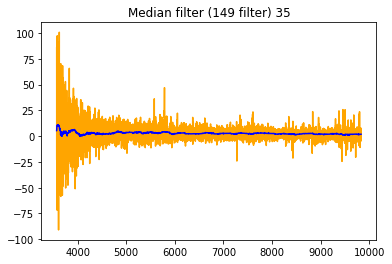

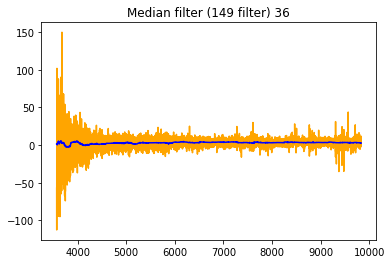

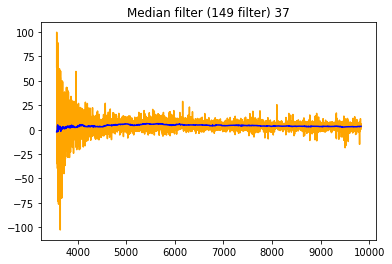

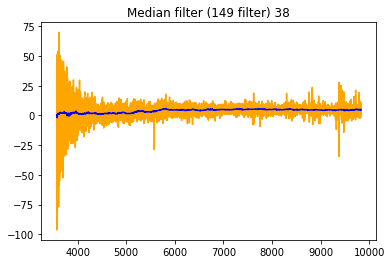

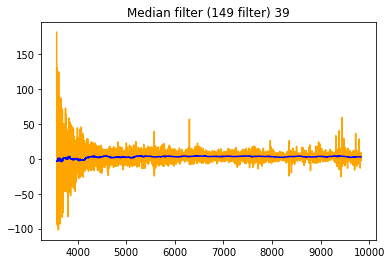

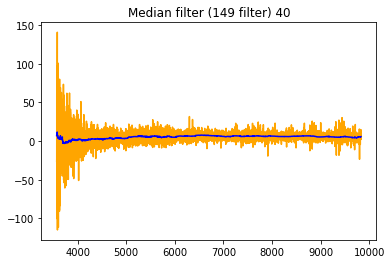

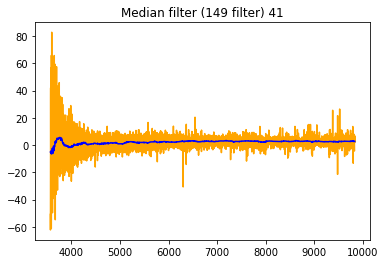

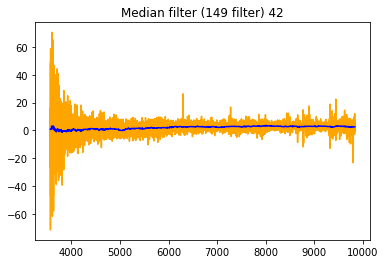

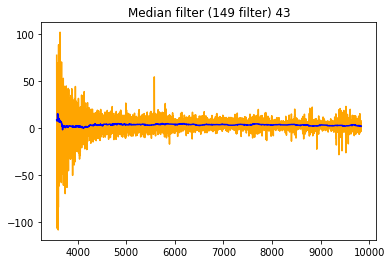

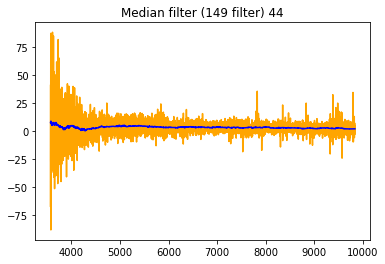

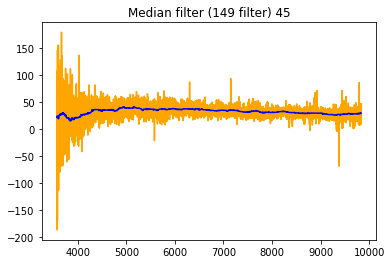

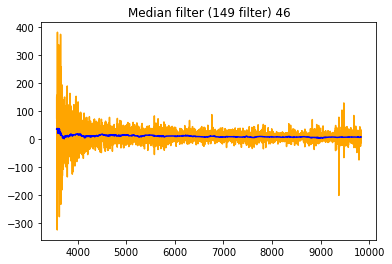

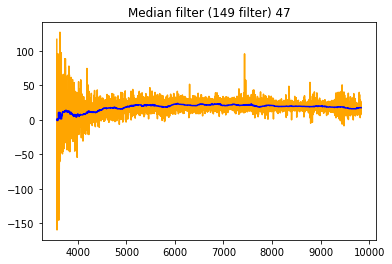

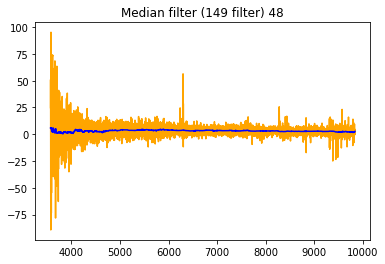

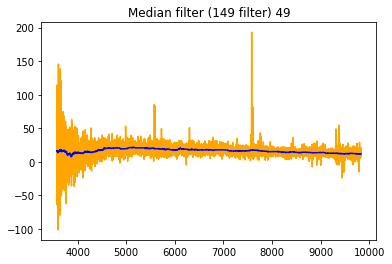

In [20]:
trial=[]
for i in range(50):
    plt.figure()
    trial_median_0 = median_filter(flux[i],149)
    plt.plot(wave,flux[i],color='orange')
    plt.plot(wave,trial_median_0,color='blue')
    plt.title("Median filter (149 filter) {0}".format(i))    
    plt.show
    trial.append(trial_median_0)

/Users/amandawasserman/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


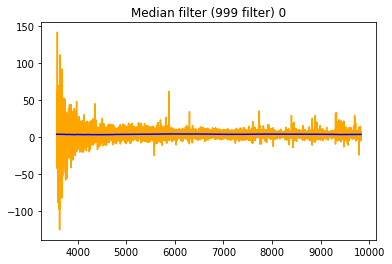

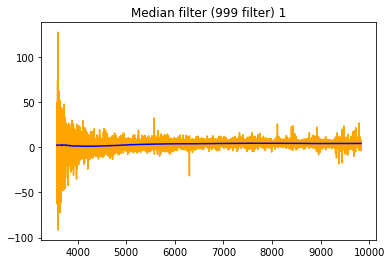

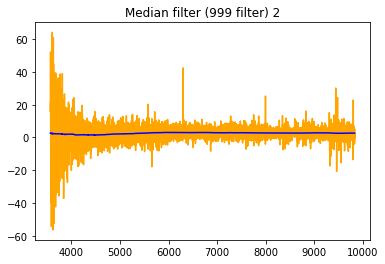

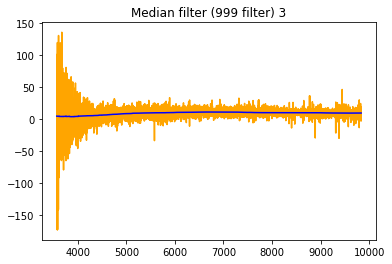

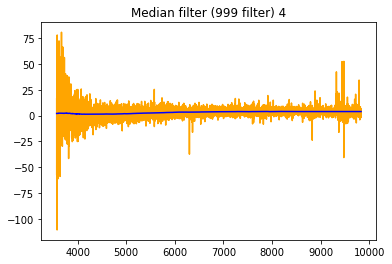

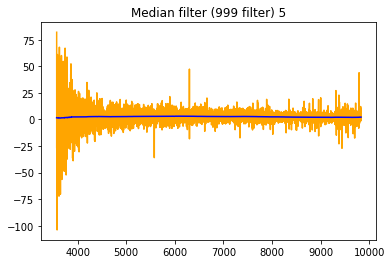

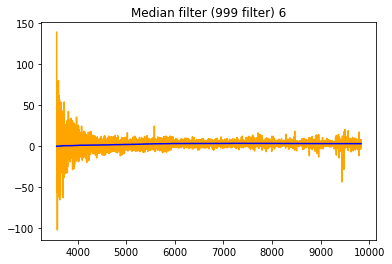

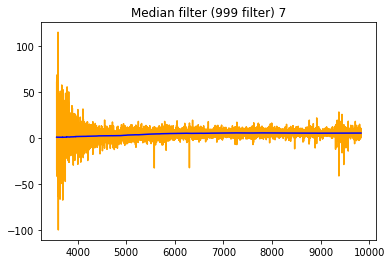

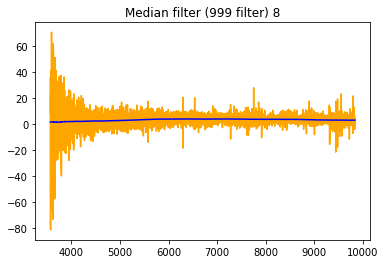

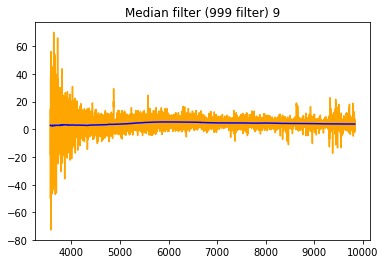

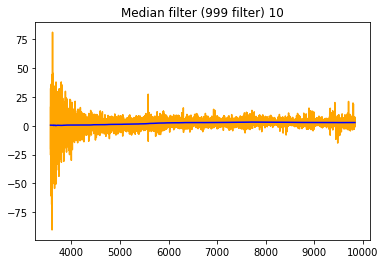

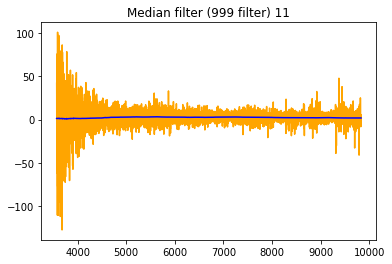

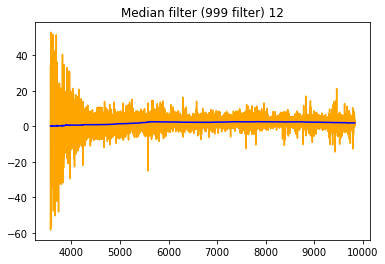

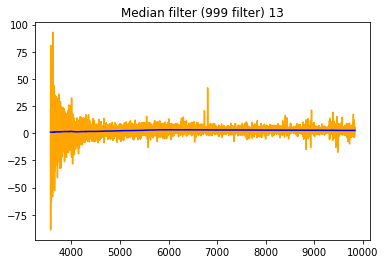

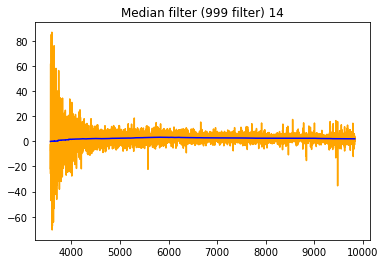

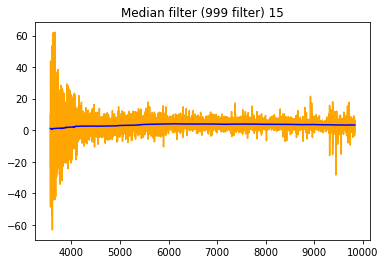

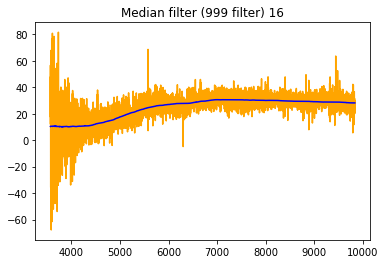

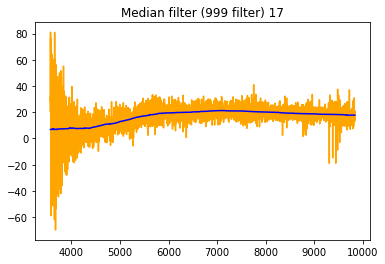

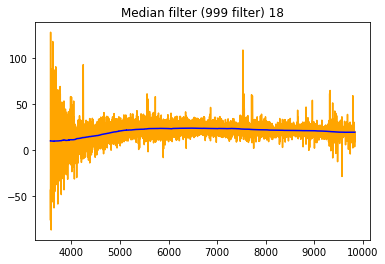

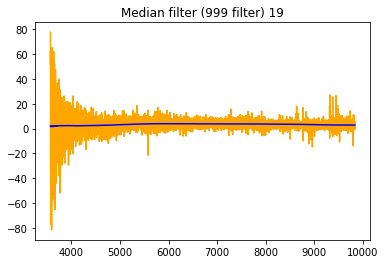

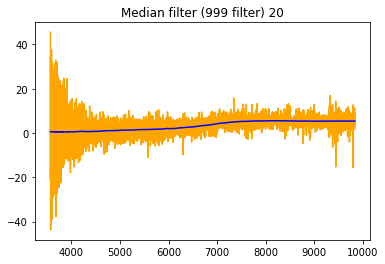

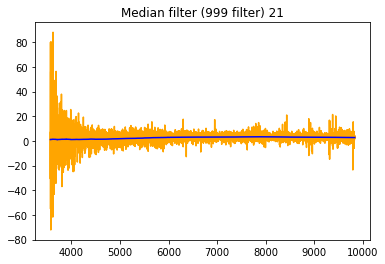

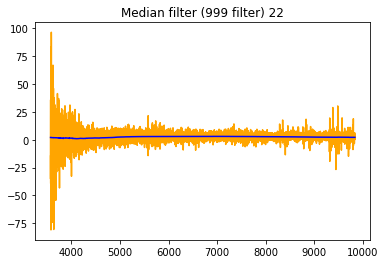

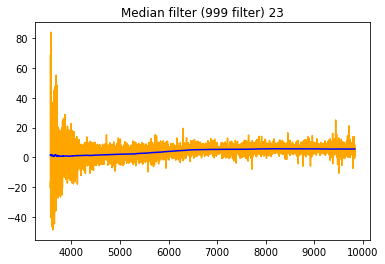

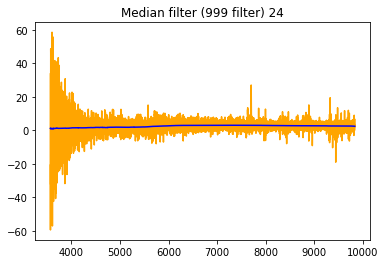

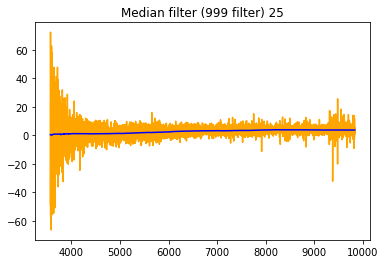

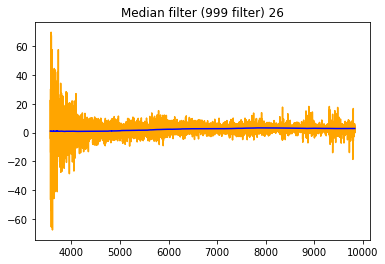

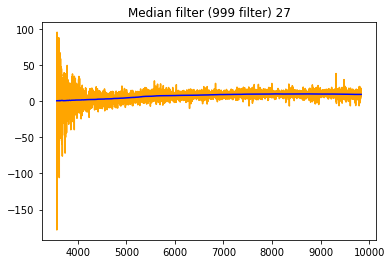

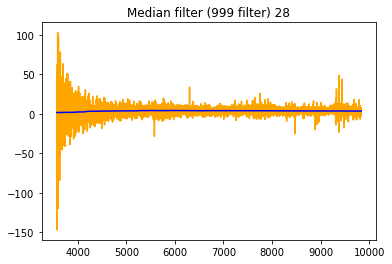

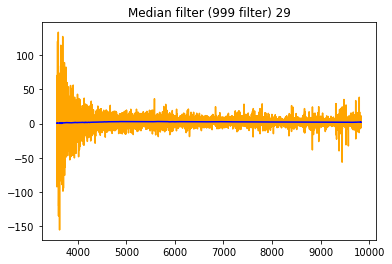

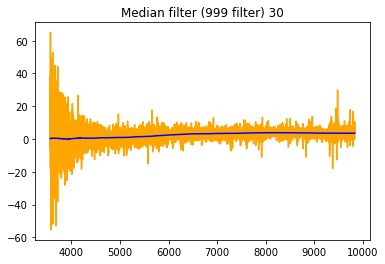

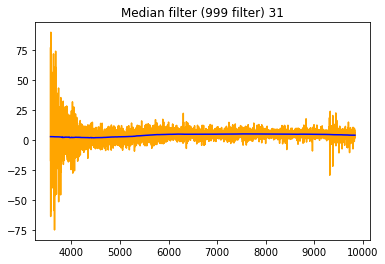

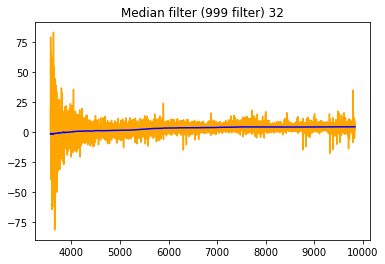

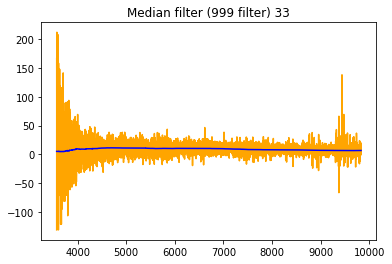

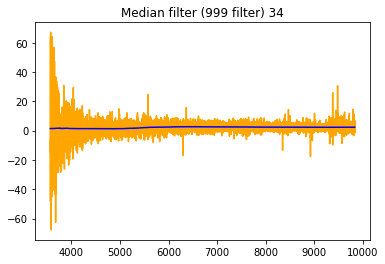

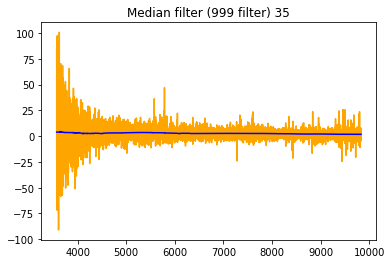

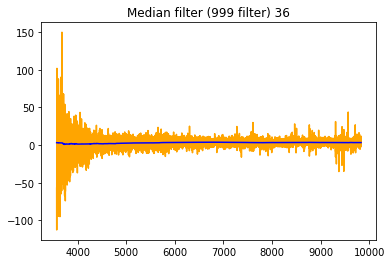

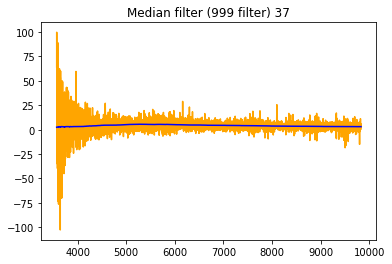

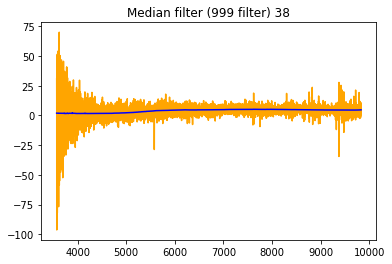

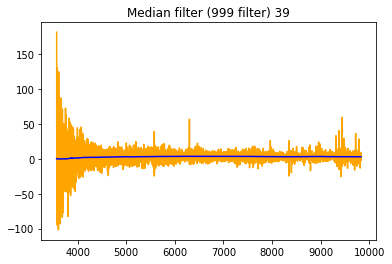

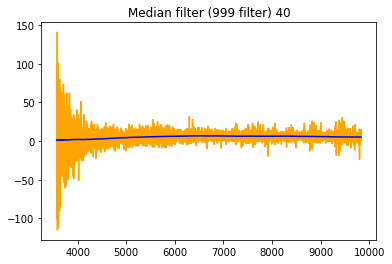

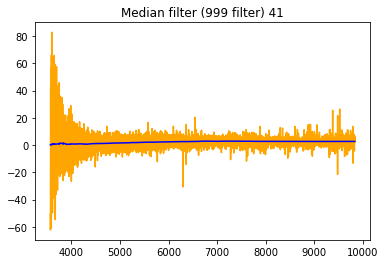

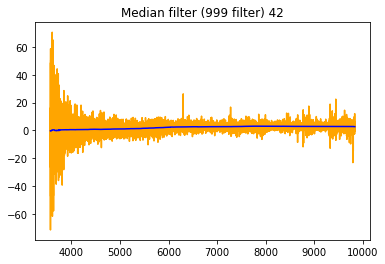

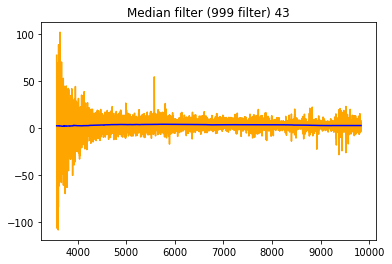

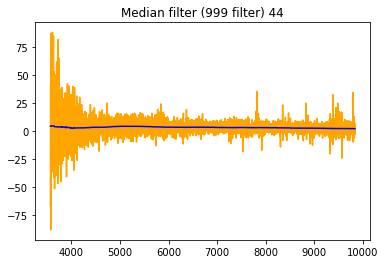

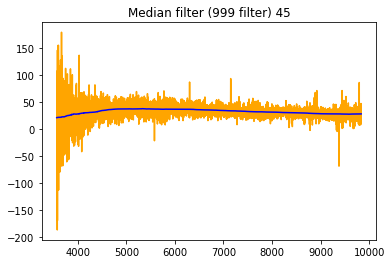

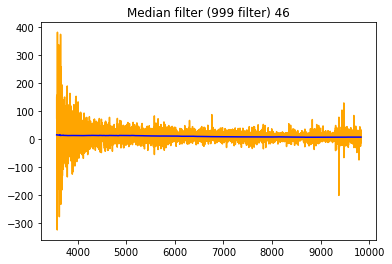

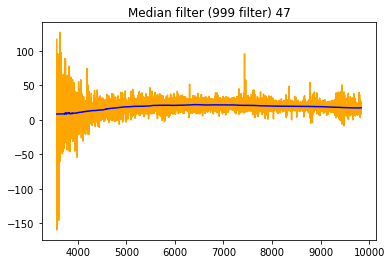

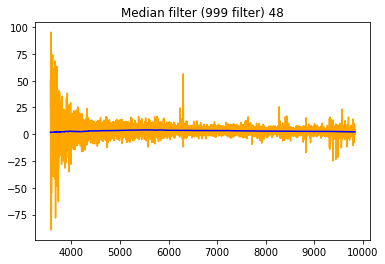

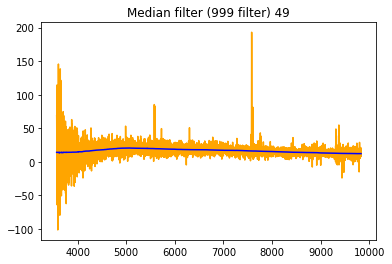

In [21]:
trial1=[]
for i in range(50):
    plt.figure()
    trial_median_1 = median_filter(flux[i],999)
    plt.plot(wave,flux[i],color='orange')
    plt.show
    plt.plot(wave,trial_median_1,color='blue')
    plt.title("Median filter (999 filter) {0}".format(i))
    plt.show
    trial1.append(trial_median_1)


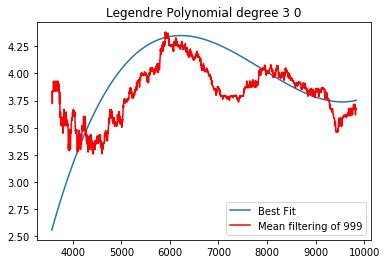

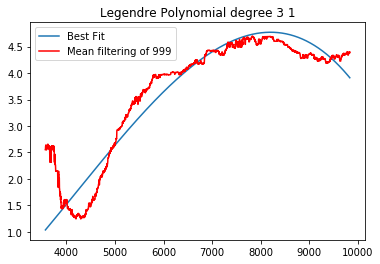

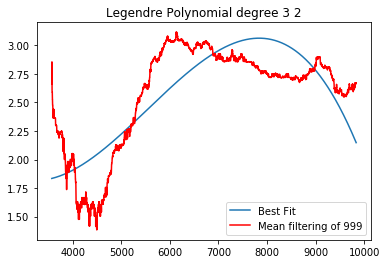

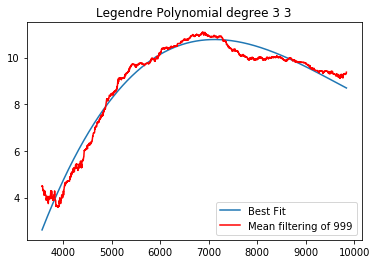

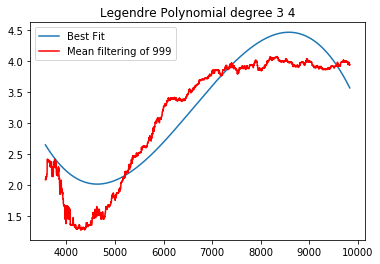

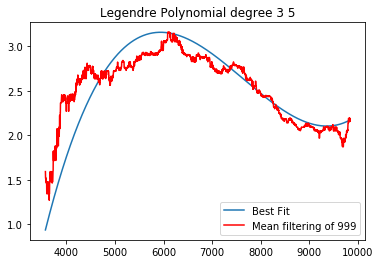

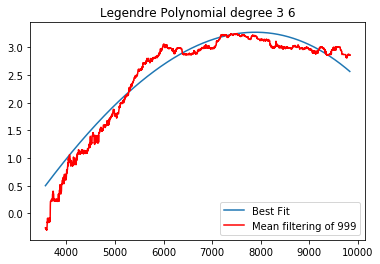

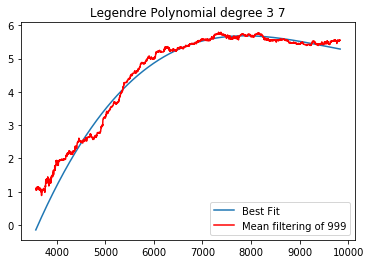

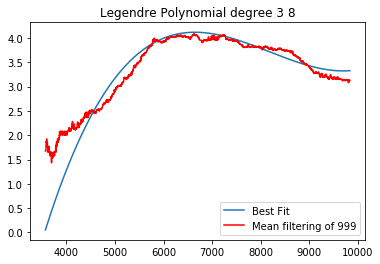

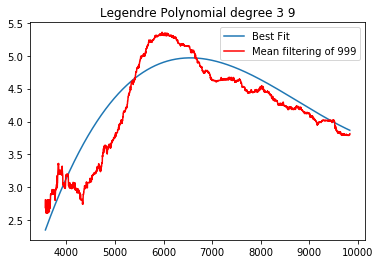

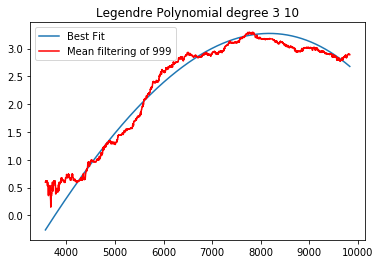

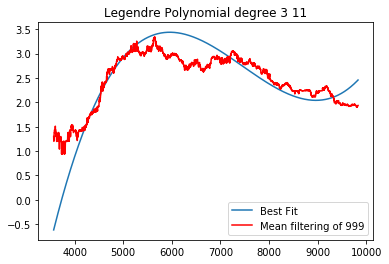

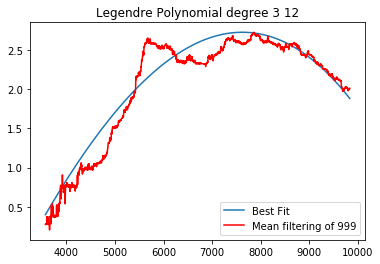

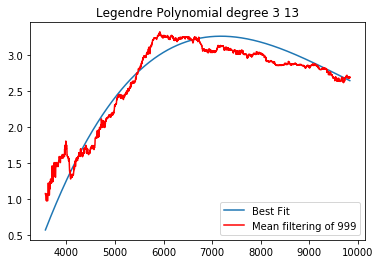

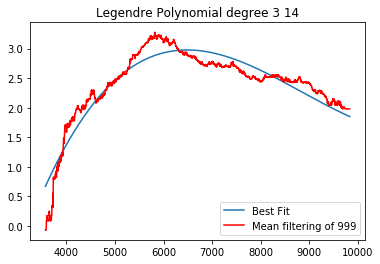

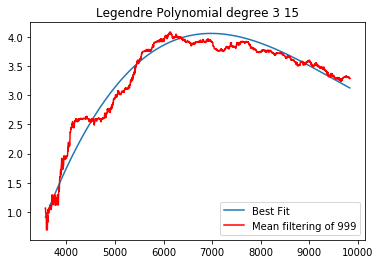

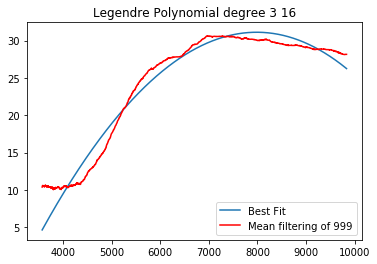

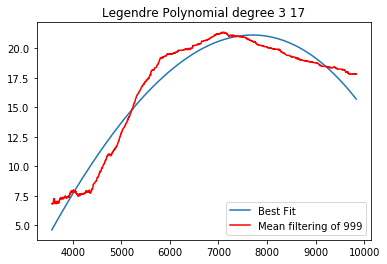

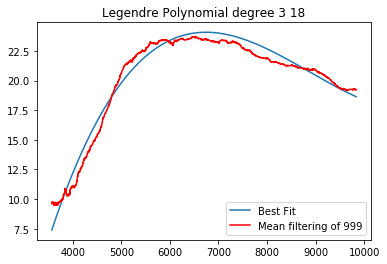

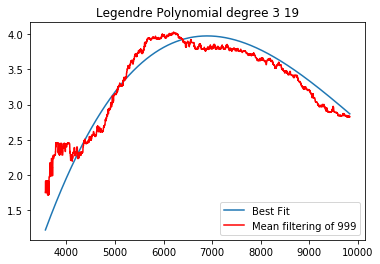

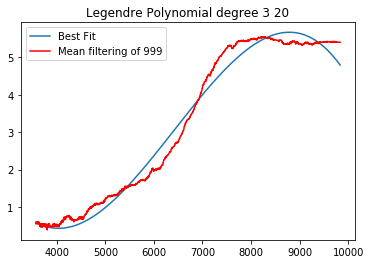

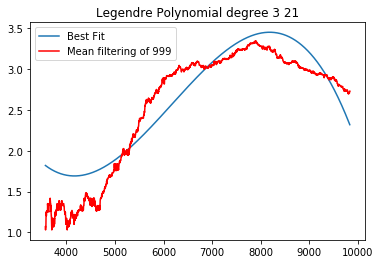

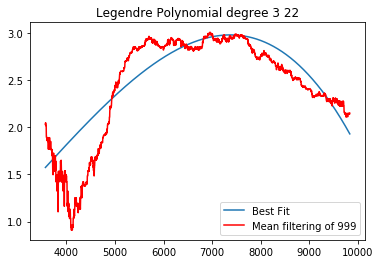

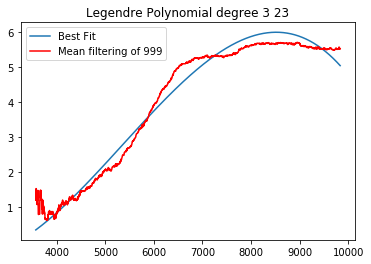

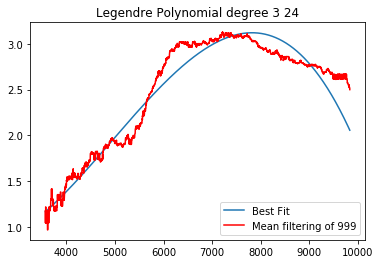

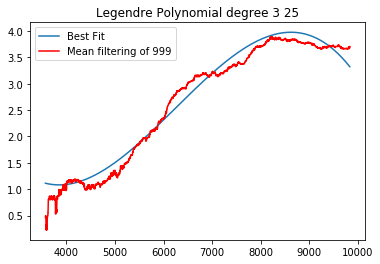

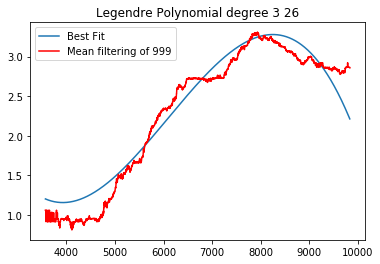

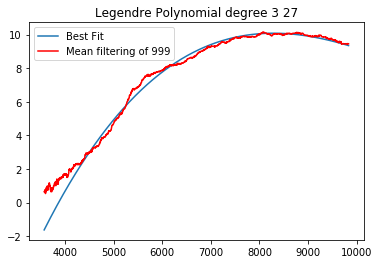

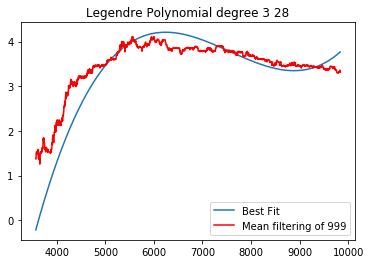

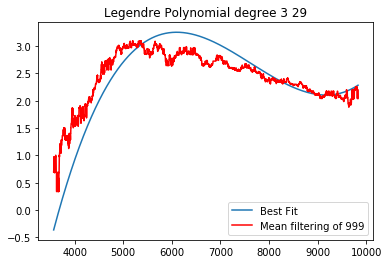

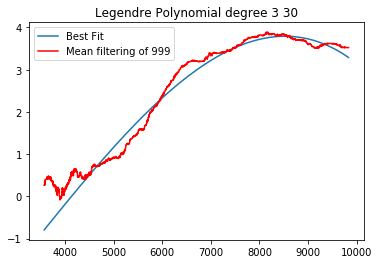

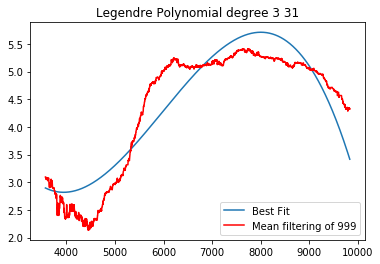

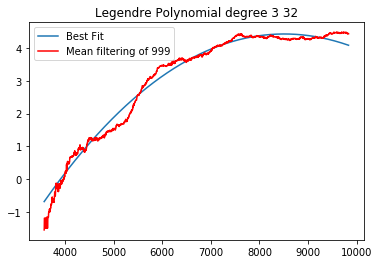

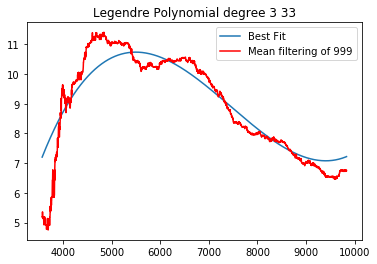

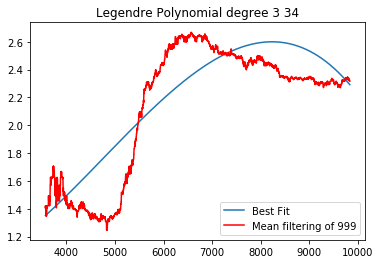

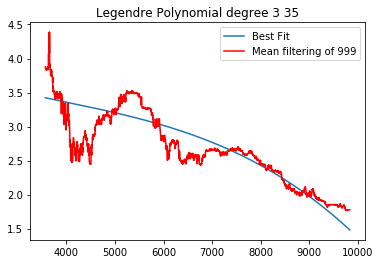

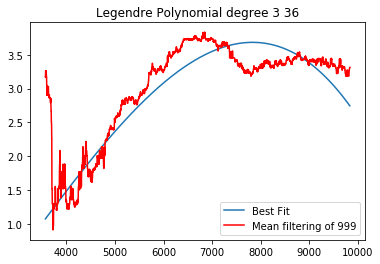

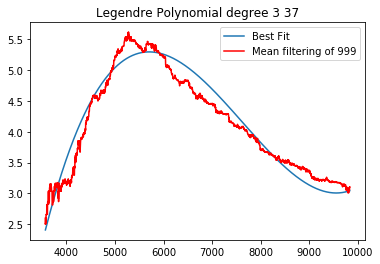

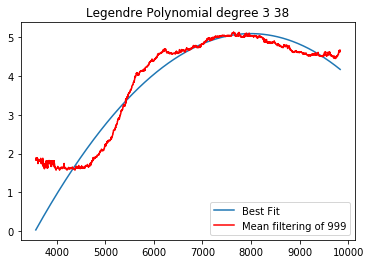

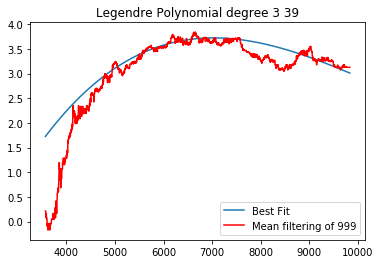

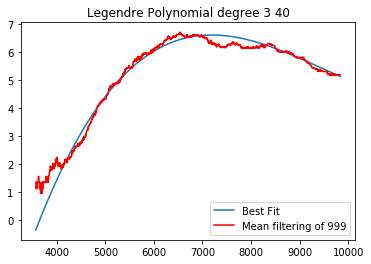

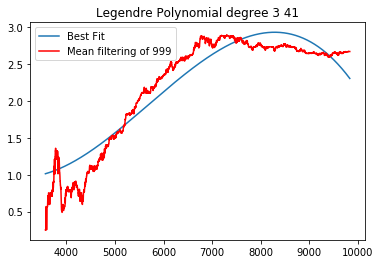

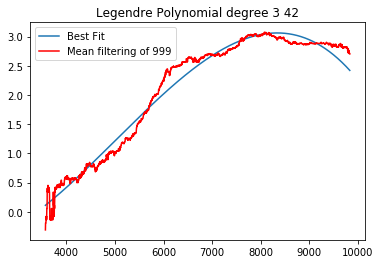

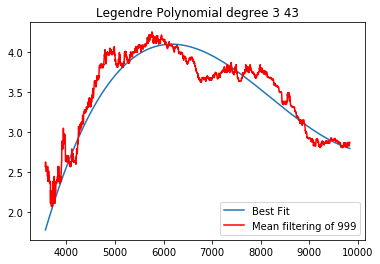

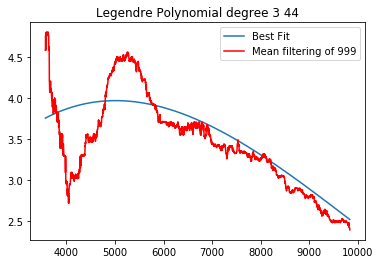

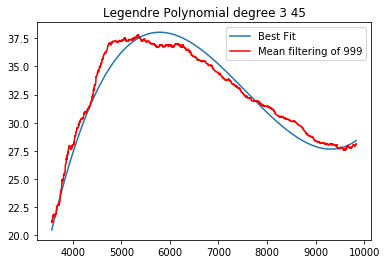

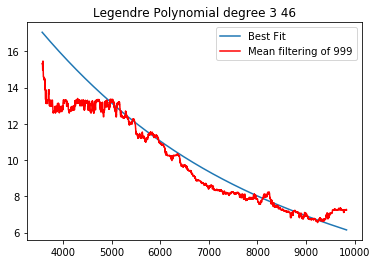

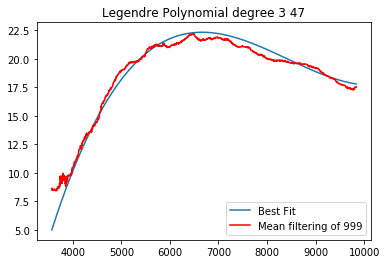

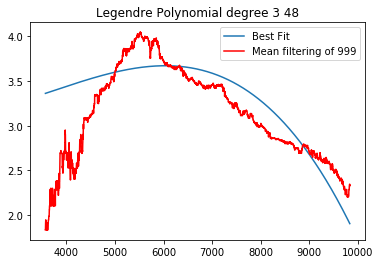

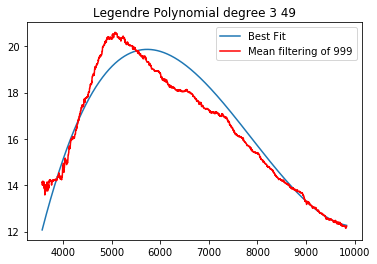

In [22]:
import matplotlib.pyplot as plt
import numpy as np
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.legendre.Legendre.fit.html
# (x, y, deg)
polynomial_array=[]
for i in range(50):
    plt.figure()
    polynomial = np.polynomial.legendre.legfit(wave,flux[i],3)
    polynomial_array.append(polynomial)
    plt.plot(wave, np.polynomial.legendre.legval(wave, polynomial), label='Best Fit')
    plt.title("Legendre Polynomial degree 3 {0}".format(i))
    plt.plot(wave,trial1[i],color='red', label='Mean filtering of 999')
    plt.legend()
    plt.show()



In [23]:
residual = []
for i in range(50):
    residual.append(trial[i] - np.polynomial.legendre.legval(wave, polynomial_array[i]))

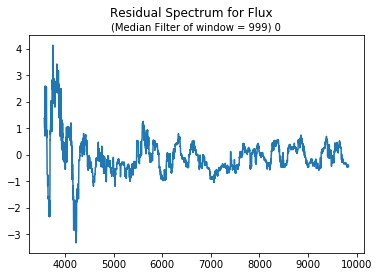

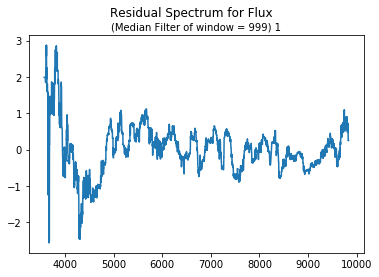

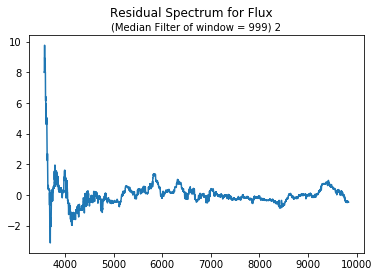

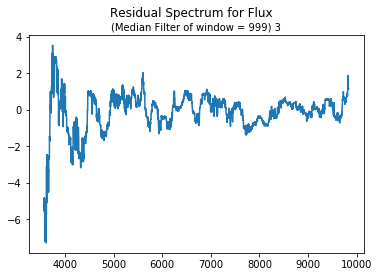

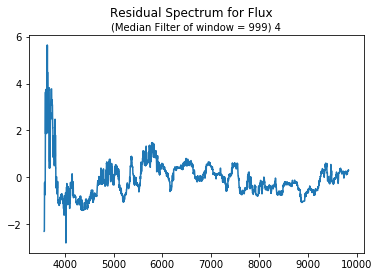

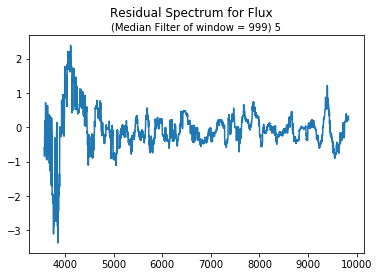

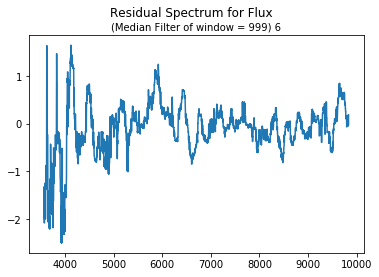

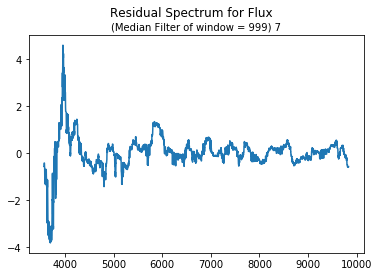

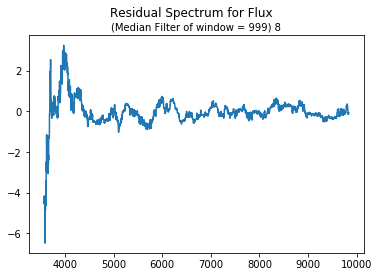

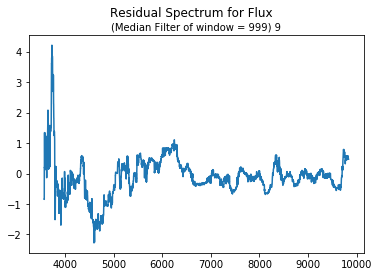

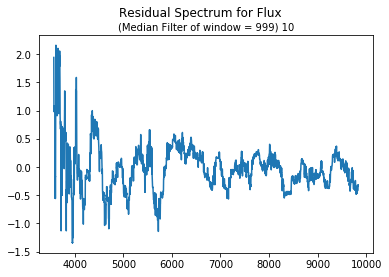

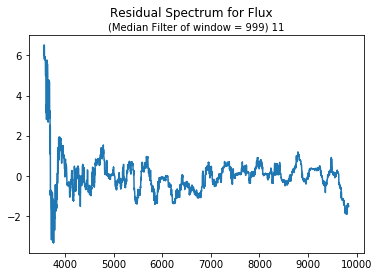

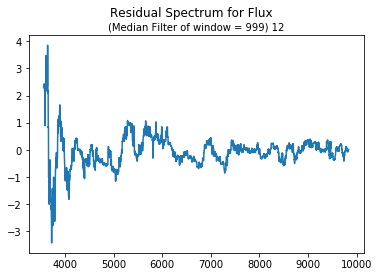

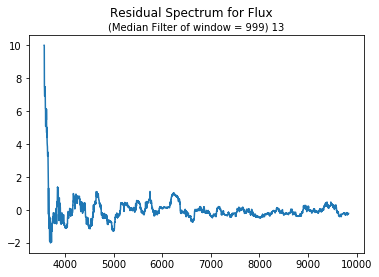

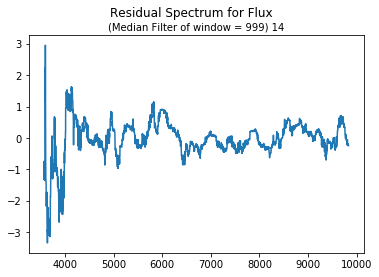

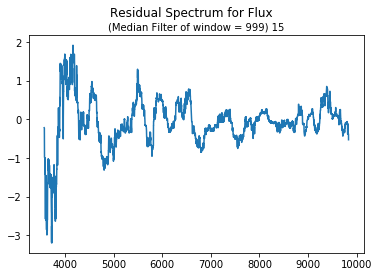

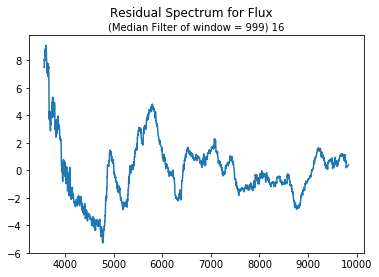

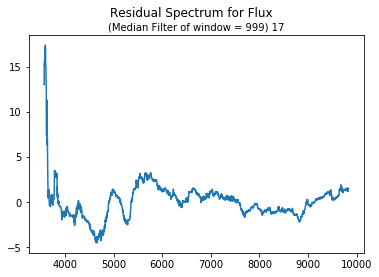

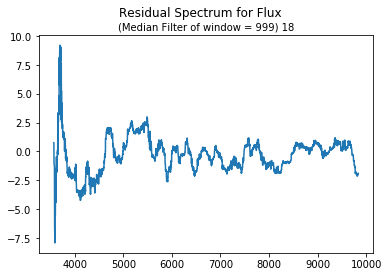

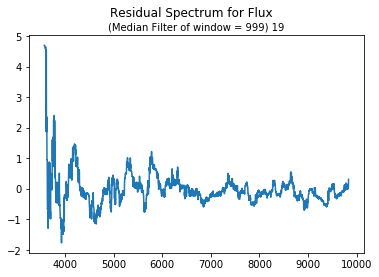

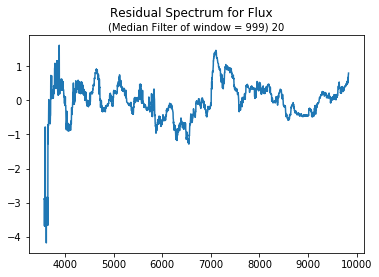

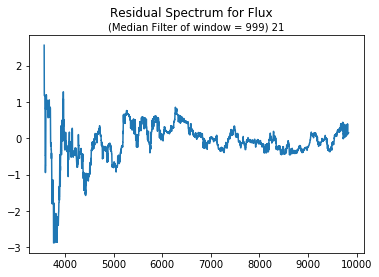

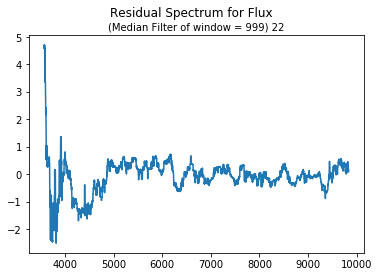

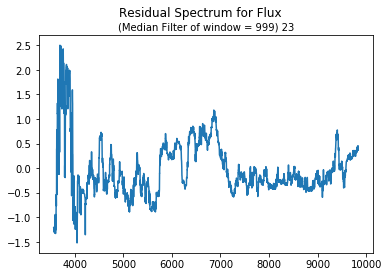

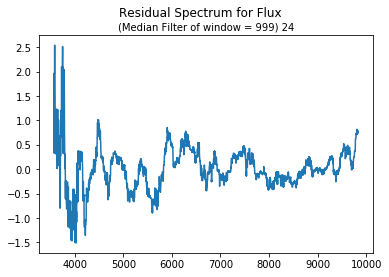

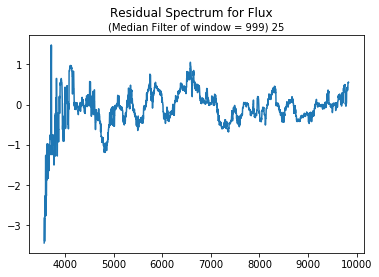

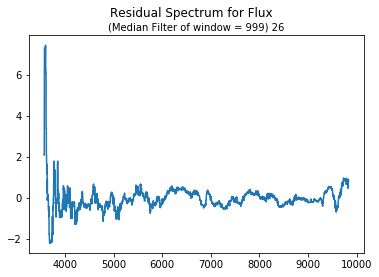

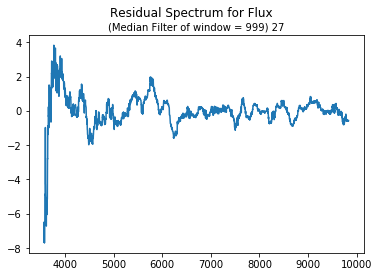

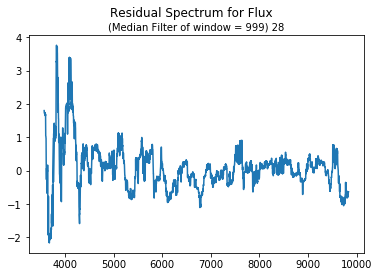

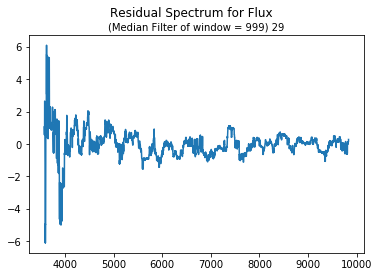

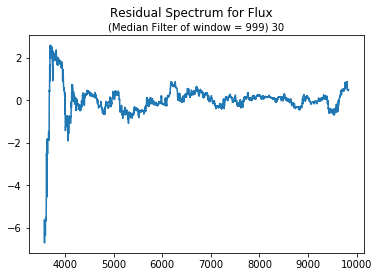

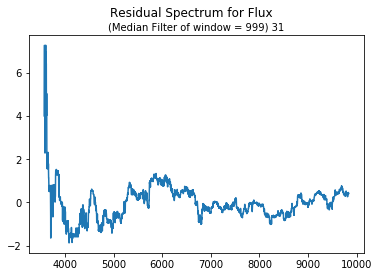

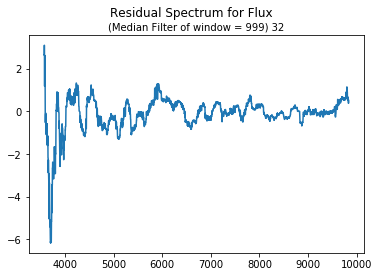

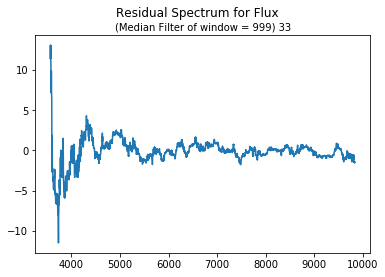

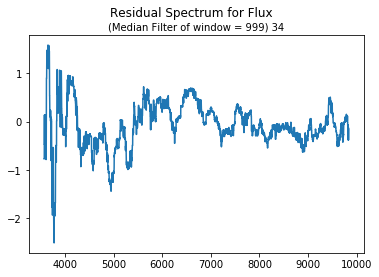

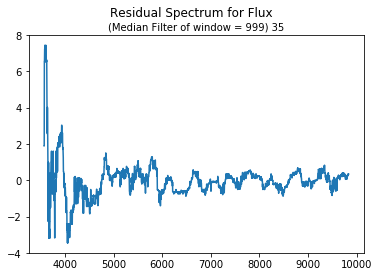

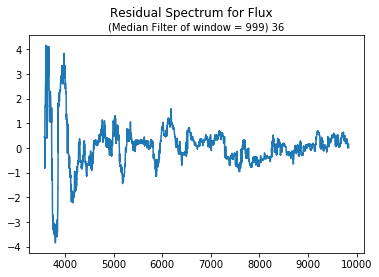

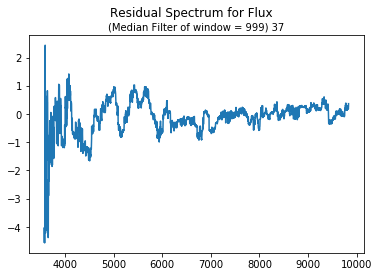

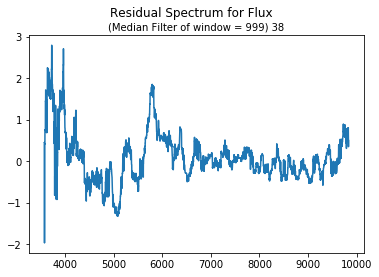

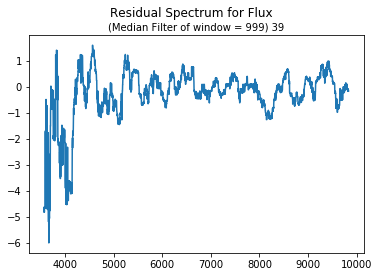

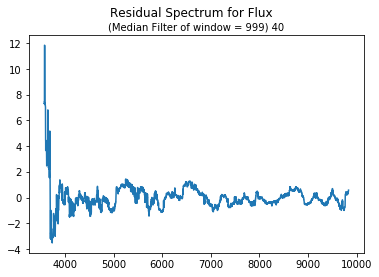

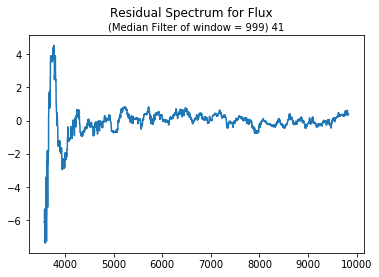

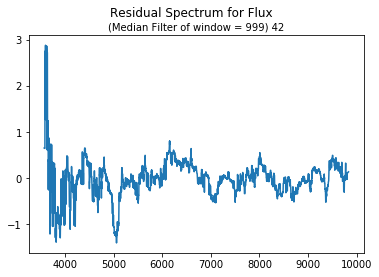

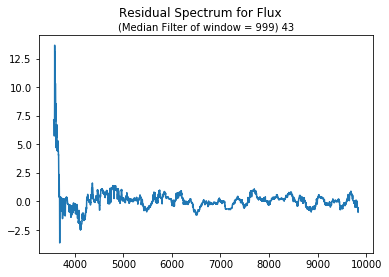

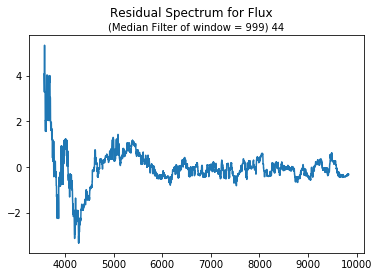

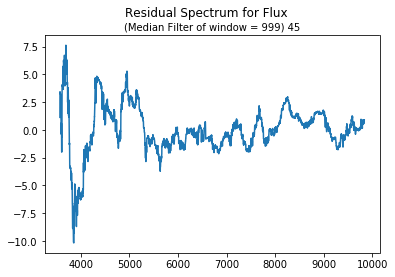

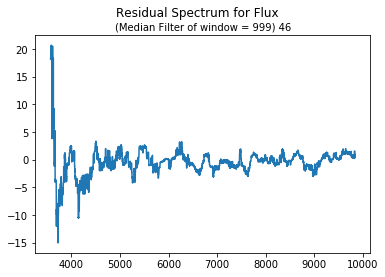

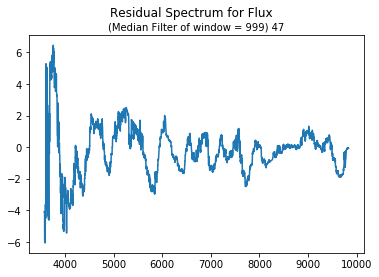

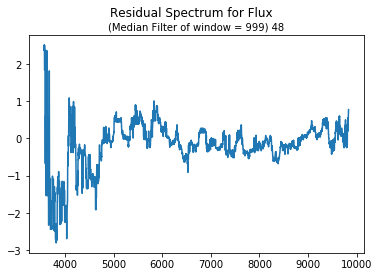

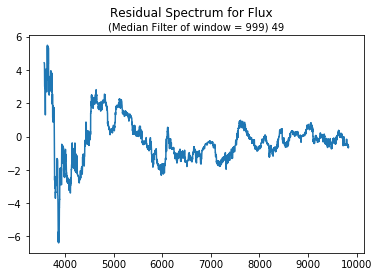

In [24]:
for i in range(50):
    plt.figure()
    plt.plot(wave,residual[i])
    plt.suptitle("Residual Spectrum for Flux")
    plt.title("(Median Filter of window = 999) {0}".format(i), fontsize=10)
    plt.show()